In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cleaned Data
df_cleaned = pd.read_csv("C:/Users/Dell/Desktop/Jupyter MLT Homework - Cross Validation - Models Testing/cleaned_data.csv", encoding="utf-8")

In [3]:
# Show Cleaned Data
df_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,1
1,1,1,1,0,0,1.0,0,8.714732,4.859812,5.888878,0
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,1
3,1,1,0,1,0,1.0,2,8.505525,4.795791,5.888878,1
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,1


In [ ]:
# Show Data Issue (Imbalanced Data)

Loan_Status  Gender
0            1         155
             0          37
1            1         347
             0          75
Name: count, dtype: int64


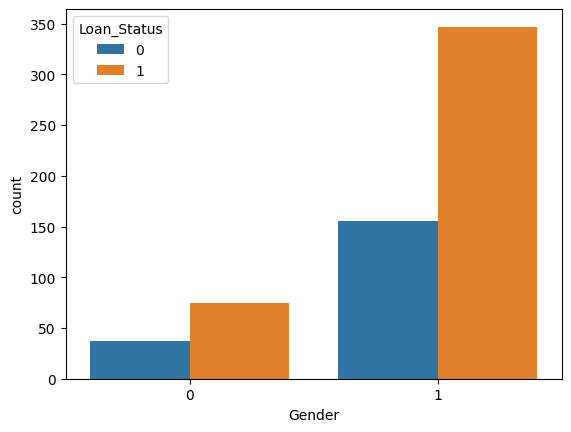

In [6]:
# Gender and Loan_Status relation
Gender_LoanStatus_relation = df_cleaned.groupby('Loan_Status')['Gender'].value_counts()
print(Gender_LoanStatus_relation)
sns.countplot(x ='Gender', hue = "Loan_Status", data = df_cleaned)
plt.show()

Loan_Status  Credit_History
0            1.0               110
             0.0                82
1            1.0               415
             0.0                 7
Name: count, dtype: int64


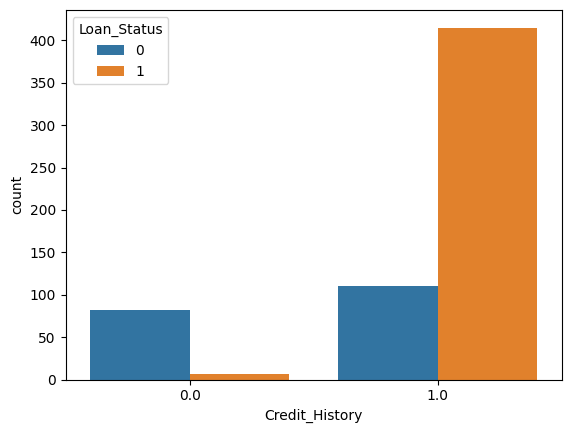

In [7]:
# Credit_History and Loan_Status relation
CreditHistory_LoanStatus_relation = df_cleaned.groupby('Loan_Status')['Credit_History'].value_counts()
print(CreditHistory_LoanStatus_relation)
sns.countplot(x ='Credit_History', hue = "Loan_Status", data = df_cleaned)
plt.show()


 Target Varibale (Loan Status) Ditribuation
Loan_Status
1    422
0    192
Name: count, dtype: int64
Loan_Status
1    68.729642
0    31.270358
Name: proportion, dtype: float64


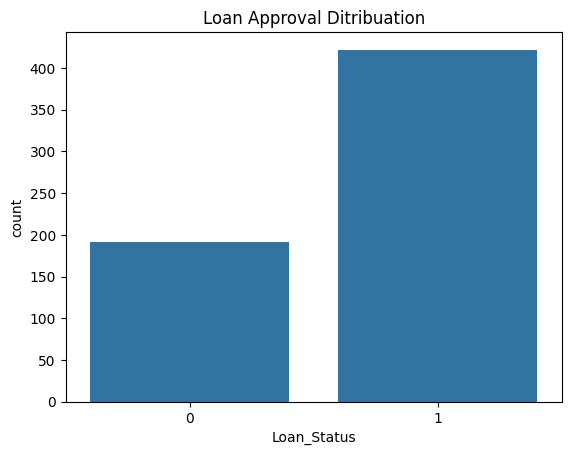

In [8]:
# Visualize the ditribution of the target variavle (Loan_Status)
print("\n Target Varibale (Loan Status) Ditribuation")
print(df_cleaned['Loan_Status'].value_counts())
print(df_cleaned['Loan_Status'].value_counts(normalize=True)*100)
sns.countplot(x='Loan_Status', data=df_cleaned)
plt.title("Loan Approval Ditribuation")
plt.show()

In [9]:
# Columns Distribution
X = df_cleaned.iloc[:, np.r_[0:10]]
y = df_cleaned.iloc[:, 10]

In [10]:
# Cross Validation :
# Use Stratified KFold to fit an unbalanced data distribution.
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
# Model Testing

In [11]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()

# Logestic Regression metrics
score = cross_val_score(lg_model, X, y, cv= skf,scoring='accuracy')
print('accuracy score for each fold :\n',score)
print(f'Average accuracy score: {"{:.2f}".format(score.mean())}')

score = cross_val_score(lg_model, X, y, cv= skf,scoring='precision')
print(f'Average precision score: {"{:.2f}".format(score.mean())}')

score = cross_val_score(lg_model, X, y, cv= skf,scoring='recall')
print(f'Average recall score: {"{:.2f}".format(score.mean())}')

score = cross_val_score(lg_model, X, y, cv= skf,scoring='f1')
print(f'Average f1 score: {"{:.2f}".format(score.mean())}') 

accuracy score for each fold :
 [0.80645161 0.82258065 0.77419355 0.75806452 0.78688525 0.78688525
 0.86885246 0.85245902 0.80327869 0.83606557]
Average accuracy score: 0.81
Average precision score: 0.79
Average recall score: 0.98
Average f1 score: 0.88


In [12]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

# Decision Tree Classifier metrics
score = cross_val_score(dtc_model, X, y, cv= skf,scoring='accuracy')
print('accuracy score for each fold :\n',score)
print(f'Average accuracy score: {"{:.2f}".format(score.mean())}')

score = cross_val_score(dtc_model, X, y, cv= skf,scoring='precision')
print(f'Average precision score: {"{:.2f}".format(score.mean())}')

score = cross_val_score(dtc_model, X, y, cv= skf,scoring='recall')
print(f'Average recall score: {"{:.2f}".format(score.mean())}')

score = cross_val_score(dtc_model, X, y, cv= skf,scoring='f1')
print(f'Average f1 score: {"{:.2f}".format(score.mean())}') 

accuracy score for each fold :
 [0.75806452 0.77419355 0.67741935 0.66129032 0.60655738 0.70491803
 0.78688525 0.72131148 0.73770492 0.75409836]
Average accuracy score: 0.72
Average precision score: 0.79
Average recall score: 0.80
Average f1 score: 0.80


In [13]:
# Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

# Random Forest Classifier metrics
score = cross_val_score(rfc_model, X, y, cv= skf,scoring='accuracy')
print('accuracy score for each fold :\n',score)
print(f'Average accuracy score: {"{:.2f}".format(score.mean())}')

score = cross_val_score(rfc_model, X, y, cv= skf,scoring='precision')
print(f'Average precision score: {"{:.2f}".format(score.mean())}')

score = cross_val_score(rfc_model, X, y, cv= skf,scoring='recall')
print(f'Average recall score: {"{:.2f}".format(score.mean())}')

score = cross_val_score(rfc_model, X, y, cv= skf,scoring='f1')
print(f'Average f1 score: {"{:.2f}".format(score.mean())}') 

accuracy score for each fold :
 [0.75806452 0.79032258 0.70967742 0.80645161 0.75409836 0.78688525
 0.86885246 0.83606557 0.78688525 0.81967213]
Average accuracy score: 0.79
Average precision score: 0.80
Average recall score: 0.94
Average f1 score: 0.86
